In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

### 보스턴 주택 가격 데이터셋

In [2]:
from keras.datasets import boston_housing 
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data() 

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
mean = train_data.mean(axis=0)

In [6]:
mean # column에 대한 평균값 

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [7]:
train_data = train_data - mean 

표준편차를 구한다. 

In [8]:
std = train_data.std(axis=0) 

In [9]:
train_data = train_data / std 

In [10]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [11]:
mean = test_data.mean(axis=0)
test_data -= mean 
std = test_data.std(axis=0)
test_data /= std 

### 신경망 만들기

In [12]:
from keras import models
from keras import layers 

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu', input_shape=(train_data.shape[1],))) #input컬럼 개수보다 더 많은 수로 (64)로 잡아줌. 
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) #집 값 하나가 나옴. 

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 

  return model  

### K-folder 검증 

In [13]:
# K-folder 검증
k = 4
num_epochs = 20

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate( # 2개의 값을 하나로 합친다. 
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data,
            partial_train_labels,
            epochs=num_epochs,
            batch_size=1,
            validation_data=(val_data, val_labels), 
            verbose=0 ) #verbose는 불필요한 출력 안보이게한다. 
  
  mae_history = history.history['mae'] 

  # val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
  all_scores.append(mae_history) 


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [14]:
all_scores  

[[10.18554973602295,
  3.489767551422119,
  2.958489179611206,
  2.7430152893066406,
  2.5603182315826416,
  2.462308406829834,
  2.4471235275268555,
  2.3548858165740967,
  2.3713197708129883,
  2.2365217208862305,
  2.281386375427246,
  2.2155404090881348,
  2.2099123001098633,
  2.1808228492736816,
  2.1630682945251465,
  2.1637258529663086,
  2.1222691535949707,
  2.0244979858398438,
  2.0740997791290283,
  1.9949687719345093],
 [11.034390449523926,
  3.46044921875,
  2.859736680984497,
  2.6578853130340576,
  2.5210464000701904,
  2.3945772647857666,
  2.3419642448425293,
  2.2285006046295166,
  2.2178921699523926,
  2.1833314895629883,
  2.1208112239837646,
  2.121088743209839,
  2.0812089443206787,
  2.0971803665161133,
  2.07171893119812,
  2.019153594970703,
  1.991353988647461,
  1.9579991102218628,
  1.9539474248886108,
  1.9435737133026123],
 [10.094599723815918,
  3.6073951721191406,
  3.131010055541992,
  2.7876672744750977,
  2.540198564529419,
  2.445718765258789,
  2.3

In [15]:
np.mean(all_scores)

2.7258342131972313

In [16]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

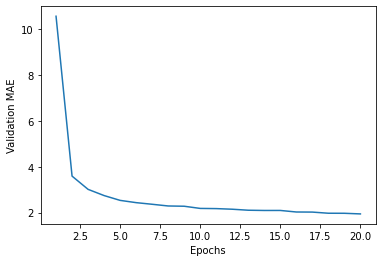

In [17]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE') 